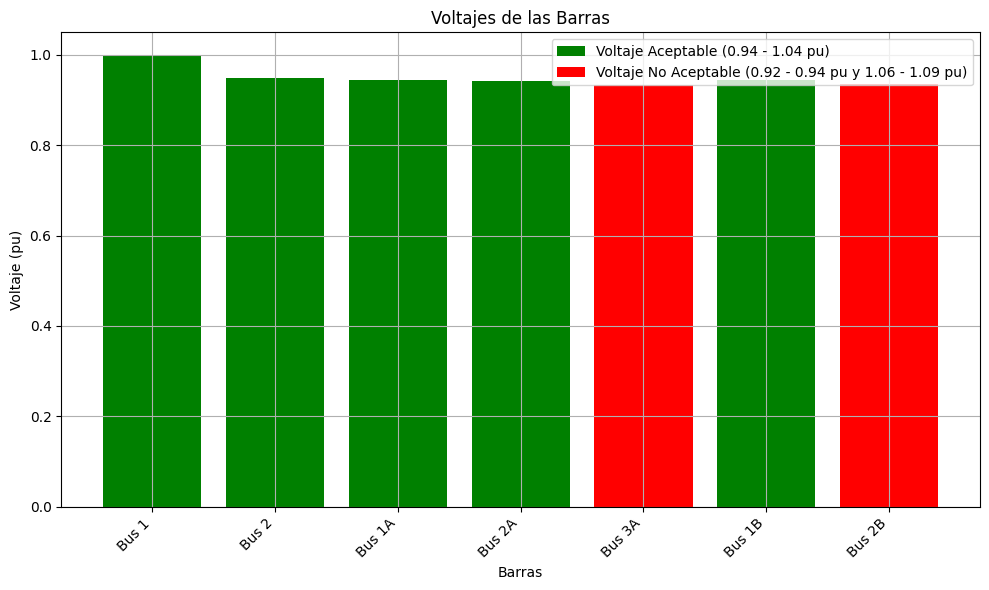

Todas las barras están dentro de la norma para ser consideradas con voltaje aceptable


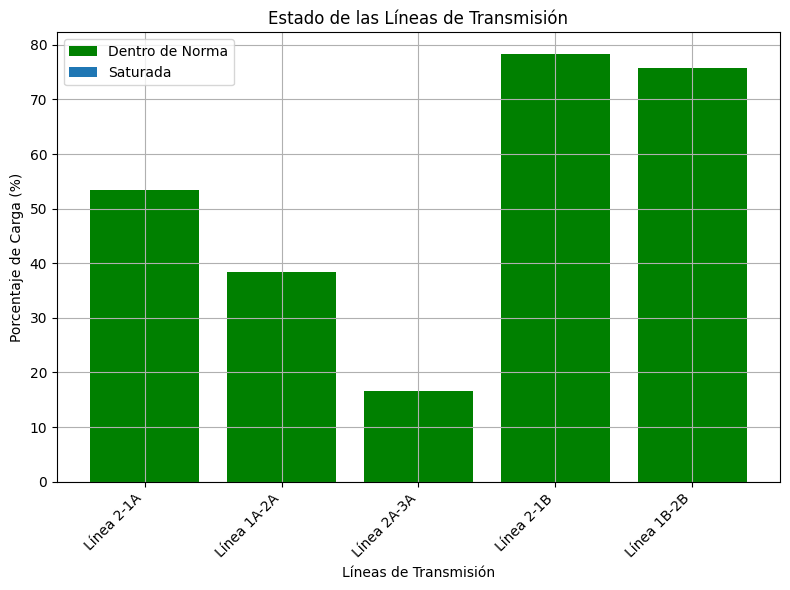

In [5]:
import pandapower as pp
import pandapower.plotting as plot
import matplotlib.pyplot as plt

# Crear la red de ejemplo
net = pp.create_empty_network()

# Crear barras
bus1 = pp.create_bus(net, vn_kv=110, name="Bus 1")
bus2 = pp.create_bus(net, vn_kv=220, name="Bus 2")
bus1a = pp.create_bus(net, vn_kv=220, name="Bus 1A")
bus2a = pp.create_bus(net, vn_kv=220, name="Bus 2A")
bus3a = pp.create_bus(net, vn_kv=220, name="Bus 3A")
bus1b = pp.create_bus(net, vn_kv=220, name="Bus 1B")
bus2b = pp.create_bus(net, vn_kv=220, name="Bus 2B")

# Crear las líneas de transmisión
pp.create_line(net, from_bus=bus2, to_bus=bus1a, length_km=10, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 2-1A")
pp.create_line(net, from_bus=bus1a, to_bus=bus2a, length_km=15, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 1A-2A")
#pp.create_line(net, from_bus=bus2a, to_bus=bus3a, length_km=20, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 2A-3A")
pp.create_line(net, from_bus=bus3a, to_bus=bus2b, length_km=15, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 3A-2B")
pp.create_line(net, from_bus=bus2, to_bus=bus1b, length_km=10, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 2-1B")
pp.create_line(net, from_bus=bus1b, to_bus=bus2b, length_km=30, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 1B-2B")

# Crear un transformador
pp.create_transformer(net, hv_bus=bus2, lv_bus=bus1, std_type="100 MVA 220/110 kV", name="Trafo 1-2")

# Crear una barra slack
pp.create_ext_grid(net, bus=bus1, vm_pu=1.0)

# Definir la carga nominal para todas las barras
p_nominal = 150  # MW
q_nominal = 100  # MVAr

# Cargas para cada barra 
pp.create_load(net, bus=bus1a, p_mw=p_nominal*0.2, q_mvar=q_nominal*0.2, name="Load 1A")
pp.create_load(net, bus=bus2a, p_mw=p_nominal*0.35, q_mvar=q_nominal*0.35, name="Load 2A")
pp.create_load(net, bus=bus3a, p_mw=p_nominal*0.15, q_mvar=q_nominal*0.15, name="Load 3A")
pp.create_load(net, bus=bus1b, p_mw=p_nominal*0.1, q_mvar=q_nominal*0.1, name="Load 1B")
pp.create_load(net, bus=bus2b, p_mw=p_nominal*0.6, q_mvar=q_nominal*0.6, name="Load 2B")

# Ejecutar flujo de carga
pp.runpp(net)

# Obtener resultados de voltajes de las barras
bus_voltages = net.res_bus.vm_pu

# Clasificar los voltajes
acceptable_voltages = bus_voltages[(bus_voltages >= 0.94) & (bus_voltages <= 1.04)]
unacceptable_voltages = bus_voltages[((bus_voltages >= 0.92) & (bus_voltages < 0.94)) | ((bus_voltages > 1.06) & (bus_voltages <= 1.09))]

# Crear un gráfico para visualizar los voltajes de las barras
plt.figure(figsize=(10, 6))

plt.bar(acceptable_voltages.index, acceptable_voltages, color='green', label='Voltaje Aceptable (0.94 - 1.04 pu)')
plt.bar(unacceptable_voltages.index, unacceptable_voltages, color='red', label='Voltaje No Aceptable (0.92 - 0.94 pu y 1.06 - 1.09 pu)')

bus_names = net.bus.name.tolist()
plt.xticks(ticks=bus_voltages.index, labels=bus_names, rotation=45, ha='right')
plt.xlabel('Barras')
plt.ylabel('Voltaje (pu)')
plt.title('Voltajes de las Barras')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Para ajustar el layout y evitar superposición de etiquetas
plt.show()
print("Todas las barras están dentro de la norma para ser consideradas con voltaje aceptable")

# Identificar las líneas saturadas y generar un gráfico del estado de cada línea
line_loading = net.res_line.loading_percent
saturated_lines = line_loading[line_loading > 100]

# Crear un gráfico para visualizar el estado de las líneas
plt.figure(figsize=(8, 6))

line_names = ["Línea 2-1A", "Línea 1A-2A", "Línea 2A-3A", "Línea 2-1B", "Línea 1B-2B"]  # Nuevos nombres de las líneas

plt.bar(line_loading.index, line_loading, color='green', label='Dentro de Norma')
plt.bar(saturated_lines.index, saturated_lines, color='red', label='Saturada')
plt.xticks(ticks=line_loading.index, labels=line_names, rotation=45, ha='right')
plt.xlabel('Líneas de Transmisión')
plt.ylabel('Porcentaje de Carga (%)')
plt.title('Estado de las Líneas de Transmisión')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Para ajustar el layout y evitar superposición de etiquetas
plt.show()